In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [66]:
df=pd.read_csv(r"C:\Users\Sejal\Desktop\ML\play_tennis.csv")
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [70]:
n=df.isnull().sum()
n

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [73]:
df[['outlook','temp','humidity','wind','play']]=df[['outlook','temp','humidity','wind','play']].apply(LabelEncoder().fit_transform)

In [74]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1


In [77]:
x=df.iloc[:,[1,2,3,4]].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[2 1 0 1]
 [2 1 0 0]
 [0 1 0 1]
 [1 2 0 1]
 [1 0 1 1]
 [1 0 1 0]
 [0 0 1 0]
 [2 2 0 1]
 [2 0 1 1]
 [1 2 1 1]
 [2 2 1 0]
 [0 2 0 0]
 [0 1 1 1]
 [1 2 0 0]]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [81]:
len(x_train)
x_train

array([[2, 2, 0, 1],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 1],
       [2, 1, 0, 1],
       [0, 1, 0, 1],
       [2, 2, 1, 0],
       [1, 0, 1, 0]], dtype=int64)

In [82]:
x_train=np.array([[2, 2, 0, 1],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 1],
       [2, 1, 0, 1],
       [0, 1, 0, 1],
       [2, 2, 1, 0],
       [1, 0, 1, 0]],)
x_train_1=x_train.ravel()

In [83]:
x_train_1

array([2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0])

In [85]:
from sklearn.tree import  DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.9, 'x[0] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.3, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

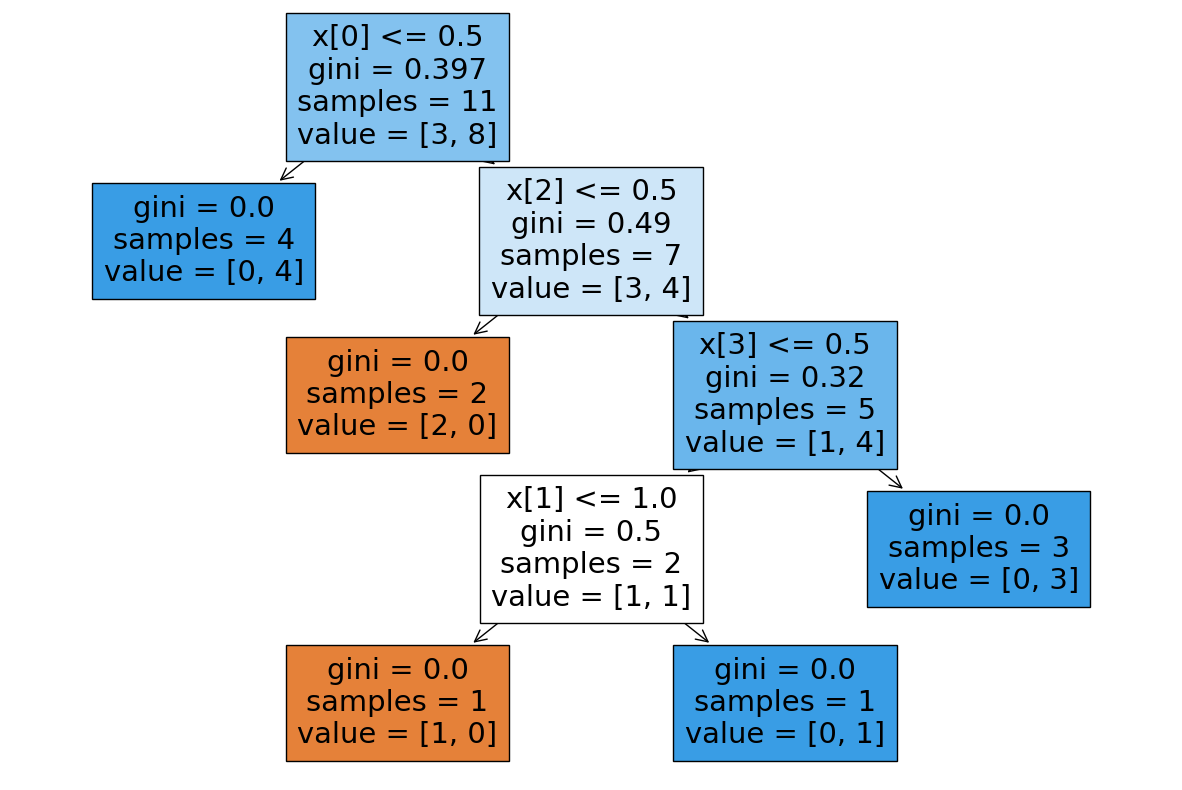

In [88]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)